# Homework Telkomsel Data Science - Python
### Data use: Titanic Data [Titanic](https://www.kaggle.com/c/titanic)
### Goal: Figure out the factor that indicate Survivors

In [3]:
#Import all required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#Create datafile from train.csv and examine the data
df = pd.read_csv('hw/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Note on Data:
    * survival, 0=No, 1=Yes
    * pclass -> Ticket class, 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
    * Age -> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 
    * sibsp -> # of siblings / spouses aboard the Titanic
    * parch -> # of parents / children aboard the Titanic
    * cabin -> Cabin number
    * embarked -> Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#Cek data size and column
print(df.shape)
print(df.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


* There are 12 Column that contain 5 string (object) informatin and 7 numeric information
* Let's see more detail for numeric information

In [7]:
#Check Null data
df.isnull().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Data for Cabin contain only 33% while age contain 80% data
* Eliminate Cabin information since only 33% data is filled
* Drop these column for following analysis since these coloumn apply for each data: 
    * PassengerId
    * Name
    * Ticket

In [10]:
#Drop unnecessary data
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Figure out the statistic of numeric data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Note from Describe and info:
    * 38.4% Survivor
    * Rata-rata social class: 2.3 (Low Medium Class)
    * Rata-rata Age: 29.7 tahun
    * Rata-rata Sibling = 0.52
    * Rata-rata Parent = 0.38
    * Rata-rata Fare = USD 32.2

In [12]:
#Find correlation within parameter
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


* Based on Correlation, survived Passenger explained by: 
    * Pclass (33.8%)
    * Fare (25.7%)
* However, Pclass and Fare has strong correlation 55%, as we can assume that Higher Class will pay higher Fare
* Less explained by:
    * Parch (8.2%)
    * SibSp (3.5%)
    * Age (7.7%)
* For Object based, we need to consider this parameter:
    * Sex            
    * Embarked       

In [13]:
#Create 2 data set for Survivor and Non Survivor
dfSurvivor=df[df['Survived']==1] #Survivor Data
dfNSurvivor=df[df['Survived']==0] #Non-Survivor Data
print(dfSurvivor.head(5))
print(dfNSurvivor.head(5))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C
   Survived  Pclass   Sex   Age  SibSp  Parch     Fare Embarked
0         0       3  male  22.0      1      0   7.2500        S
4         0       3  male  35.0      0      0   8.0500        S
5         0       3  male   NaN      0      0   8.4583        Q
6         0       1  male  54.0      0      0  51.8625        S
7         0       3  male   2.0      3      1  21.0750        S


In [14]:
#Info for both data set
print(dfSurvivor.shape)
print(dfSurvivor.describe())
print(dfNSurvivor.shape)
print(dfNSurvivor.describe())

(342, 8)
       Survived      Pclass         Age       SibSp       Parch        Fare
count     342.0  342.000000  290.000000  342.000000  342.000000  342.000000
mean        1.0    1.950292   28.343690    0.473684    0.464912   48.395408
std         0.0    0.863321   14.950952    0.708688    0.771712   66.596998
min         1.0    1.000000    0.420000    0.000000    0.000000    0.000000
25%         1.0    1.000000   19.000000    0.000000    0.000000   12.475000
50%         1.0    2.000000   28.000000    0.000000    0.000000   26.000000
75%         1.0    3.000000   36.000000    1.000000    1.000000   57.000000
max         1.0    3.000000   80.000000    4.000000    5.000000  512.329200
(549, 8)
       Survived      Pclass         Age       SibSp       Parch        Fare
count     549.0  549.000000  424.000000  549.000000  549.000000  549.000000
mean        0.0    2.531876   30.626179    0.553734    0.329690   22.117887
std         0.0    0.735805   14.172110    1.288399    0.823166   31.3

* Insight dari 2 data set di atas:
    * Terdapat 342 survivor dan 549 non-survivor
    * Tingkat Ekonomi (P-Class):
        * Rata-rata Survivor memiliki tingkat ekonomi Menengah ke Atas (Mean: 1.95) 
        * Sedangkan non-Survivor memiliki tingkat ekonomi Menengah ke Bawah (Mean: 2.5)
    * Umur:
        * Rata-rata Survivor berumur 28.3 tahun dengan usia paling 'muda' 0.42 tahun dan paling 'tua' 80 tahun
        * Rata-rata Non-Survivor berumur 30.6 tahun dengan usia paling 'muda' 1 tahun dan paling 'tua' 74 tahun
    * Jumlah Sibling dan Parent/Child yang onboard:
        * Baik Survivor maupun Non-Survivor memiliki rata-rata yang sama sekitar 0.5 untuk Sibing dan 0.4 untuk Parent
    * Rata-rata Survivor membayar 2 kali lipat dari non Survivor

## Untuk bagian selanjutnya, kita akan mencari insight melalui Grafik

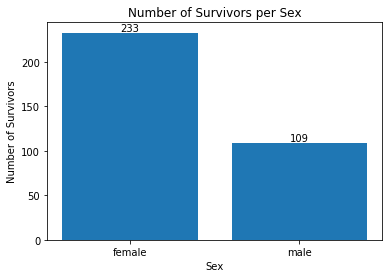

In [15]:
#Survivor berdasarkan Jenis Kelamin
fig, ax = plt.subplots()
Survivors = dfSurvivor['Sex'].value_counts().reset_index(name='Survivors')

# scatter the Survivors against the Sex
gambar=ax.bar(Survivors['index'], Survivors['Survivors'])
# set a title and labels
ax.set_title('''Number of Survivors per Sex''')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Survivors')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(gambar)
plt.savefig('SurvivorsBySex.png');

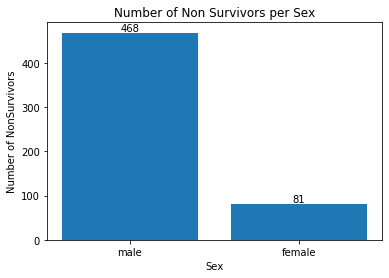

In [16]:
#Survivor berdasarkan Jenis Kelamin
fig, ax = plt.subplots()
Survivors = dfNSurvivor['Sex'].value_counts().reset_index(name='NonSurvivors')

# scatter the Survivors against the Sex
gambar=ax.bar(Survivors['index'], Survivors['NonSurvivors'])
# set a title and labels
ax.set_title('''Number of Non Survivors per Sex''')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of NonSurvivors')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(gambar)
plt.savefig('NonSurvivorsBySex.png');

* Analisa berdasarkan data Jenis Kelamin:
    * Wanita memiliki kesempatan untuk selamat dibandingkan Pria

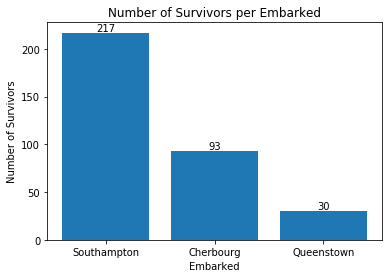

In [17]:
# Survivor berdasarkan Pelabuhan Keberangkatan
fig, ax = plt.subplots()
Survivors = dfSurvivor['Embarked'].value_counts().reset_index(name='Survivors')
gambar=ax.bar(Survivors['index'], Survivors['Survivors'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(gambar)

# set a title and labels
ax.set_title('''Number of Survivors per Embarked''')
ax.set_xlabel('Embarked')
ax.set_ylabel('Number of Survivors')
ax.set_xticklabels(['Southampton', 'Cherbourg','Queenstown'])
plt.savefig('SurvivorsByEmbarked.png');

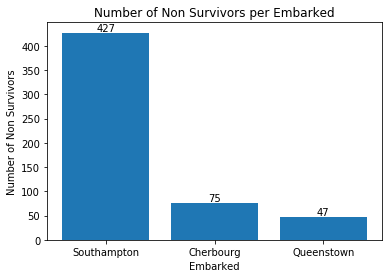

In [18]:
# Non Survivor berdasarkan Pelabuhan Keberangkatan
fig, ax = plt.subplots()
Survivors = dfNSurvivor['Embarked'].value_counts().reset_index(name='NonSurvivors')
gambar=ax.bar(Survivors['index'], Survivors['NonSurvivors'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(gambar)

# set a title and labels
ax.set_title('''Number of Non Survivors per Embarked''')
ax.set_xlabel('Embarked')
ax.set_ylabel('Number of Non Survivors')
ax.set_xticklabels(['Southampton', 'Cherbourg','Queenstown'])
plt.savefig('NonSurvivorsByEmbarked.png');

* Analisa bedasarkan Embarked Port:
    * Secara jumlah Survivor paling banyak berangkat dari Southampton, Chebourg dan Queenstown secara berurutan
    * Namun dilihat dari persentase tingkat keselamatan Survivor paling banyak adalah Chebourg (55.3) dan Queenstown (38.9%), Southampton (33.7%)   

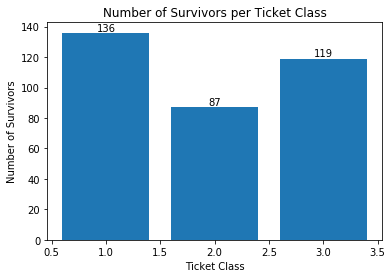

In [23]:
# Survivor berdasarkan Ticket Class
fig, ax = plt.subplots()
Survivors = dfSurvivor['Pclass'].value_counts().reset_index(name='Survivors')

# scatter the Survivors against the PClass
gambar=ax.bar(Survivors['index'], Survivors['Survivors'])
# set a title and labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(gambar)
ax.set_title('''Number of Survivors per Ticket Class''')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Number of Survivors')
plt.savefig('SurvivorsByTicketClass.png');

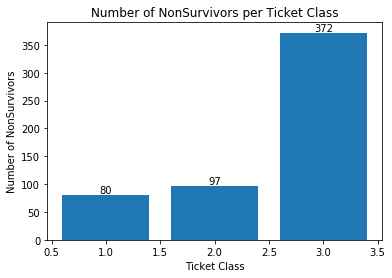

In [24]:
# NonSurvivor berdasarkan Ticket Class
fig, ax = plt.subplots()
NonSurvivors = dfNSurvivor['Pclass'].value_counts().reset_index(name='NonSurvivors')
gambar=ax.bar(NonSurvivors['index'], NonSurvivors['NonSurvivors'])
autolabel(gambar)
ax.set_title('''Number of NonSurvivors per Ticket Class''')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Number of NonSurvivors')
plt.savefig('NonSurvivorsByTicketClass.png');

* Analisa berdasarkan Tiket Class:
    * Jumlah Survivor paling banyak adalah Pemegang tiket kelas 1 sedangkan non-survivor paling banyak adalah pemegang tiket kelas 3

In [25]:
#Combine Ticket Class and Gender
a=dfSurvivor.groupby(['Pclass', 'Sex'])['Survived'].count().reset_index()
b=df.groupby(['Pclass', 'Sex'])['Survived'].count().reset_index()
c=[a['Survived']/b['Survived']*100]
print(a)
print(c)

   Pclass     Sex  Survived
0       1  female        91
1       1    male        45
2       2  female        70
3       2    male        17
4       3  female        72
5       3    male        47
[0    96.808511
1    36.885246
2    92.105263
3    15.740741
4    50.000000
5    13.544669
Name: Survived, dtype: float64]


* Analisa menggunakan Gender dana Pclass:
    * Female dengan tiket class 1 (Upper) memiliki kemungkinan 97% menjadi survivor
    * Kemungkinan ini menurun menjadi 92% untuk tiket class 2 (Middle) dan 50% untuk tiket class 3(Lower)
    * Unruk Male dengan tiket class 1 (Upper) kemungkinan 36% menjadi survivor dan menurun menjadi 16% dan 14 % untuk tiket class 2 (Middle) dan class 3 (Lower)

* Kemungkinan Analisa lain:
    * Selain analisa menggunakan parameter: Pclass, Sex dan Embarked dapat juga dilakukan analisa dengan parameter Nama ataupun Tiket untuk mengetahui nama penumpang atau tiket yang paling banyak menjadi survivor